In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import urllib.request
from bs4 import BeautifulSoup
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import display,  HTML, Markdown, clear_output
from IPython.core.display import HTML
import ipywidgets as widgets
import seaborn as sns

In [2]:
personality_fp = r"data/Personality/data-final.csv"
personality = pd.read_csv(personality_fp, sep = "\t")
personality

with pd.option_context('display.max_columns', None):  # more options can be specified also
    print(personality)

         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0   4.0   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0   4.0   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0   4.0   

         EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10 

# Compare the different personality type group questions to eachother

In [3]:
#Create new dataframe of just the particular personality type
ext = personality[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']]
est = personality[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']]
arg = personality[['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']]
csv = personality[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']]
opn = personality[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']]

In [4]:
ext.mean()

EXT1     2.648067
EXT2     2.773115
EXT3     3.288349
EXT4     3.140595
EXT5     3.276960
EXT6     2.401100
EXT7     2.771744
EXT8     3.414818
EXT9     2.963740
EXT10    3.556469
dtype: float64

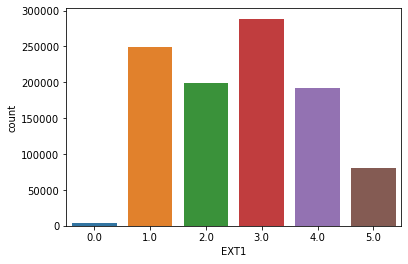

In [5]:
sns.countplot(ext['EXT1'])


## Question If I scroed high in one question, how likely is it that I scored high in another?

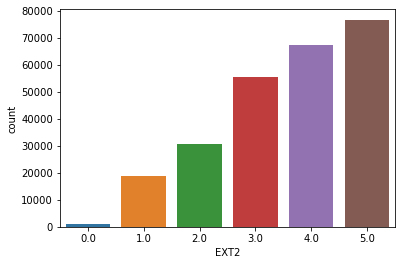

In [6]:
# Get just ext1 values with a score of 1 plot a count of ext2
ext1 = ext[ext['EXT1'] == 1]
sns.countplot(ext1['EXT2'])

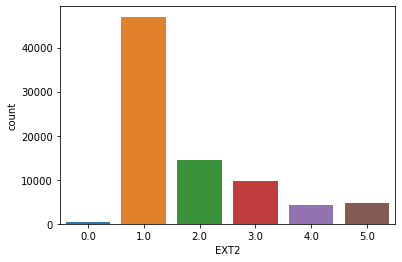

In [7]:
ext5 = ext[ext['EXT1'] == 5]
sns.countplot(ext5['EXT2'])

In [8]:
ext5

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
19,5.0,1.0,5.0,2.0,5.0,1.0,5.0,3.0,5.0,4.0
36,5.0,1.0,4.0,1.0,5.0,2.0,5.0,2.0,5.0,3.0
39,5.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,2.0
55,5.0,1.0,5.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0
61,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1015267,5.0,2.0,4.0,2.0,5.0,1.0,4.0,4.0,3.0,3.0
1015279,5.0,4.0,4.0,3.0,5.0,2.0,5.0,2.0,4.0,3.0
1015305,5.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,5.0,2.0
1015309,5.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0,5.0,1.0


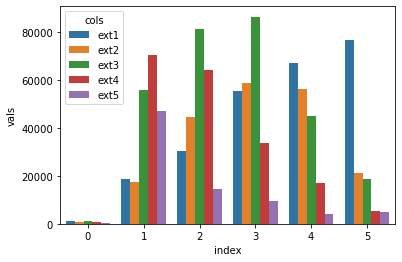

In [9]:
# We want a bar where the x axis is values of EXT1, and at each values (1,2,3,4,5) 
#it shows the count of ext (1,2,3,4,5). So there should be 25 bars in all. 
ext1 = ext[ext['EXT1'] == 1]
ext2 = ext[ext['EXT1'] == 2]
ext3 = ext[ext['EXT1'] == 3]
ext4 = ext[ext['EXT1'] == 4]
ext5 = ext[ext['EXT1'] == 5]

column_names = ["ext1", "ext2", "ext3", "ext4", "ext5"]
ext1v2 = pd.DataFrame(columns = column_names)

for i in range(6):
    ext1v2 = ext1v2.append({"ext1":len(ext1[ext1['EXT2'] == i]), "ext2":len(ext2[ext2['EXT2'] == i]), 
                 "ext3":len(ext3[ext3['EXT2'] == i]), "ext4":len(ext4[ext4['EXT2'] == i]), 
                 "ext5":len(ext5[ext5['EXT2'] == i])}, ignore_index = "True") 


    



#df = pd.concat(data, axis=1, keys=[s.name for s in data])
#ext1v2 = ext1v2.melt('x', var_name='cols', value_name='vals')
#data

#sns.countplot(ext1v2['1'])

ext1v2 = ext1v2.reset_index()

ext1v2 = ext1v2.melt('index', var_name='cols', value_name='vals')
ext1v2

sns.barplot(x= 'index', y='vals', hue='cols', data=ext1v2)

In [10]:
len(ext1[ext1['EXT2'] == 0])

989

In [11]:
def compare_two_values(col1, col2):
    score0 = personality[personality[col1] == 0]
    score1 = personality[personality[col1] == 1]
    score2 = personality[personality[col1] == 2]
    score3 = personality[personality[col1] == 3]
    score4 = personality[personality[col1] == 4]
    score5 = personality[personality[col1] == 5]
    
    column_names = [col2+"-0", col2+"-1", col2+"-2", col2+"-3", col2+"-4", col2+"-5"]
    col1v2 = pd.DataFrame(columns = column_names)
    
    
    for i in range(6):
        col1v2 = col1v2.append({column_names[0]:len(ext1[ext1[col2] == i]), column_names[1]:len(ext2[ext2[col2] == i]), 
                     column_names[2]:len(ext3[ext3[col2] == i]), column_names[3]:len(ext4[ext4[col2] == i]), 
                     column_names[4]:len(ext5[ext5[col2] == i]), column_names[4]:len(ext4[ext4[col2] == i])}, ignore_index = "True") 
    
    col1v2 = col1v2.reset_index()
    col1v2 = col1v2.melt('index', var_name='cols', value_name='vals')
    sns.barplot(x= 'index', y='vals', hue='cols', data=col1v2)

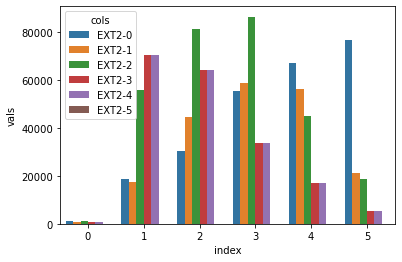

In [12]:
compare_two_values("EXT1", "EXT2")

In [13]:
pos_questions = [ # positive questions adding to the trait.
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Neuroticism
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness
]
neg_questions = [ # negative (negating) questions subtracting from the trait.
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'EST2','EST4',                       # 2 Neuroticism
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'OPN2','OPN4','OPN6',                # 3 Openness
]

personality[pos_questions] = personality[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
personality[neg_questions] = personality[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
cols = pos_questions + neg_questions
personality = personality[sorted(cols)]
personality.head()

,AGR1,AGR10,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,...,OPN1,OPN10,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9
0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0
1,2.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,...,-2.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0
2,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0
4,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0


In [16]:
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
trait_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']

for trait in traits:
    trait_cols = sorted([col for col in personality.columns if trait in col and '_E' not in col])
    personality[trait] = personality[trait_cols].sum(axis=1)
personality[traits].head()

,EXT,EST,AGR,CSN,OPN
0,16.0,-6.0,9.0,2.0,15.0
1,-10.0,-5.0,14.0,7.0,5.0
2,-5.0,-4.0,12.0,4.0,11.0
3,-4.0,-1.0,8.0,-5.0,9.0
4,-1.0,-11.0,16.0,18.0,18.0


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

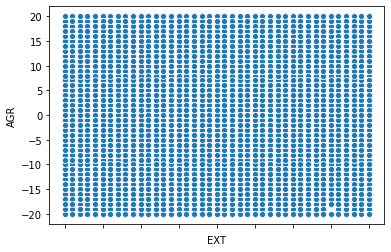

In [26]:
ax = sns.scatterplot(x= 'EXT', y='AGR', data=personality)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)